In [170]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import wilcoxon, friedmanchisquare

In [183]:
datasets = ["abalone", "acute-inflammation", "acute-nephritis", "arrhythmia", "bank", "breast-cancer",
               "car", "cardiotocography-3clases", "congressional-voting", "credit-approval", "iris"]
path = "../UA-ECE523-EngrAppMLData/data/" + datasetnames[5] + ".csv"
data = np.loadtxt(path, delimiter=",")
X, y = data[:, :-1], data[:, -1]
labels = np.unique(y)
nlabels = labels.size
print(labels)
print(X.shape)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# print(X)

[0. 1.]
(286, 9)


In [205]:
def score_dataset(X, y):
    pca = PCA(n_components=min(np.size(X, 0), np.size(X, 1)))
    pcaX = pca.fit_transform(X)

    clf = LogisticRegression(random_state=0)
    clf.fit(X, y)
    score0 = clf.score(X, y)

    clf = LogisticRegression(random_state=0)
    clf.fit(pcaX, y)
    score1 = clf.score(pcaX, y)
    
    return score0, score1

In [206]:
scores = np.zeros((len(datasets), 2))
i = 0
for dataset in datasets:
    path = "../UA-ECE523-EngrAppMLData/data/" + dataset + ".csv"
    data = np.loadtxt(path, delimiter=",")
    X, y = data[:, :-1], data[:, -1]
    scores[i] = score_dataset(X, y)
    i += 1

print(scores)

w, p = wilcoxon(scores[:, 0], scores[:, 1], alternative="greater")
print(w, p)
if p < 0.05:
    print("There is strong evidence that classifier " + str(0) + " does better than classifier " + str(1) + " at the 0.05 level.")

/home/rafa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rafa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/rafa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rafa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/rafa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

[[0.64998803 0.64998803]
 [1.         1.        ]
 [1.         1.        ]
 [0.96681416 0.96681416]
 [0.89537713 0.89537713]
 [0.73426573 0.73426573]
 [0.80150463 0.80150463]
 [0.90263405 0.90263405]
 [0.64597701 0.64597701]
 [0.86231884 0.86231884]
 [0.92666667 0.92666667]]


/home/rafa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rafa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/rafa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rafa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/rafa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

ValueError: zero_method 'wilcox' and 'pratt' do not work if the x - y is zero for all elements.

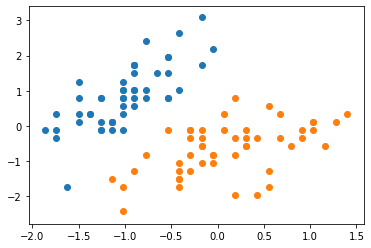

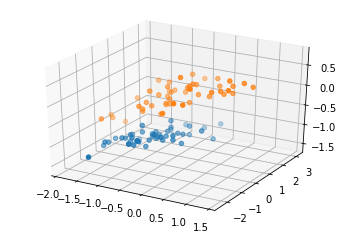

<Figure size 432x288 with 0 Axes>

In [202]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for label in labels:
    ax.scatter(X[y==label, 0], X[y==label, 1], X[y==label, 2])
plt.show()
plt.clf()

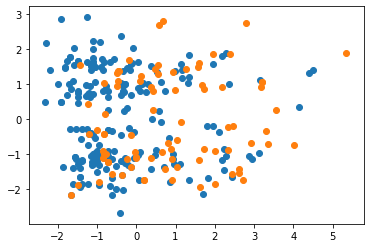

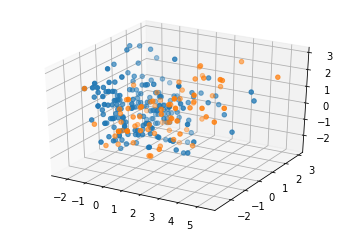

<Figure size 432x288 with 0 Axes>

In [174]:
pca = PCA(n_components=3)
pcaX = pca.fit_transform(X)

for label in labels:
    plt.scatter(pcaX[y==label, 0], pcaX[y==label, 1])

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for label in labels:
    ax.scatter(pcaX[y==label, 0], pcaX[y==label, 1], pcaX[y==label, 2])
plt.show()
plt.clf()

In [175]:
clf = LogisticRegression(random_state=0)
clf.fit(X, y)
print(clf.score(X, y))

clf = LogisticRegression(random_state=0)
clf.fit(pcaX, y)
print(clf.score(pcaX, y))

0.7342657342657343
0.7167832167832168


/home/rafa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rafa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
for i in range(np.size(hw1scores, 1)):
    for j in range(0, np.size(hw1scores, 1)):
        if i == j: continue
        w, p = wilcoxon(hw1scores[:, i], hw1scores[:, j], alternative="less")
        print(w, p)
        if p < 0.05:
            print("There is strong evidence that classifier " + str(i) + " does better than classifier " + str(j) + " at the 0.05 level.")

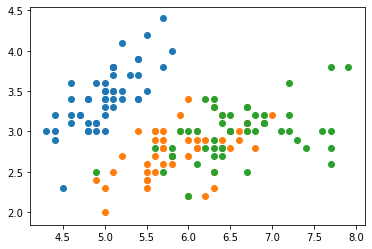

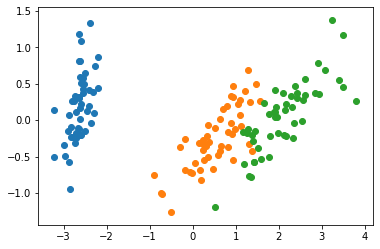

In [155]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()